import the libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('Housing.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [3]:
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [23]:
x = dataset.iloc[:,0:1]
# print(x)
y = dataset.iloc[:,1]
# print(y)

In [51]:
from sklearn.model_selection import train_test_split
xTrain , xTest , yTrain , yTest = train_test_split(x,y,test_size=1/9)

In [52]:
from sklearn.linear_model import LinearRegression
linReg = LinearRegression()
from sklearn.preprocessing import PolynomialFeatures
polyReg = PolynomialFeatures(degree = 4)
#transform بيطبق على الدالة بتعتي
xPoly = polyReg.fit_transform(xTrain)
#في الاخر هتبقى انحدار خطي عادي لانه كله في الاخر عبارة عن ارقام وليست ارقام اصلها اكس اس رقم
linReg2 = LinearRegression()
linReg2.fit(xPoly,yTrain)

LinearRegression()

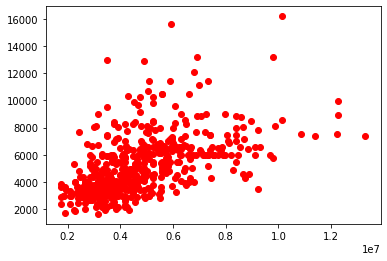

In [44]:
plt.scatter(x,y,color = 'red')


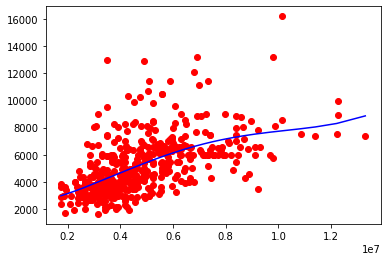

In [53]:
plt.scatter(xTrain,yTrain,color = 'red')
plt.plot(x,linReg2.predict(polyReg.fit_transform(x)),color='blue')

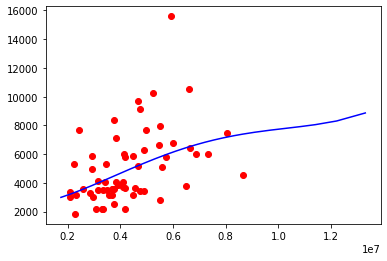

In [55]:
plt.scatter(xTest,yTest,color = 'red')
plt.plot(x,linReg2.predict(polyReg.fit_transform(x)),color='blue')

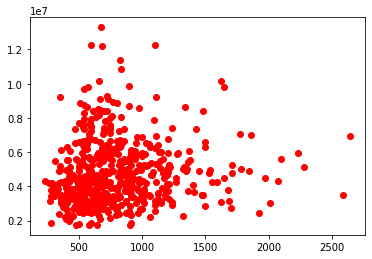

In [99]:
x = dataset.iloc[:,0:1]
xLen = len(x)
xNew = []
yNew = []
for i in range(xLen):
  xLoc = dataset.iloc[i,0:1].values
  xNew.append(xLoc)
  sum = dataset['bedrooms'] + dataset['bathrooms'] + dataset['stories']+ dataset['parking']
  yLoc =  dataset['area'] / sum
  yNew.append(yLoc)

# print(xNew) 
# print(yLoc)
  
plt.scatter(yLoc,xNew,color = 'red')
